# FRAUD DETECTION 

A classic problem in financial environments. We will take a look at classifying transitions into fraud and not fraud using scikit-learn package.

This notebook will be using a synthetic database found on kaggle for educational purposes beacuse we all need practice :-).
I will break this proces down into the follwoing steps:

1. Data Exploration 
2. Data prepartion and pre-processing 
3. Modelling 
4. Evaluation and testing 

We have the following fields within our dataset: 

transaction_id - identifier to each transaction   
user_id - identifier for each user.   
transaction_amount - amount for each transaction.   
transaction_type - how funds were exchanged e.g "payment" or "bank transfer".   
payment_mode - wallet, card, UPI etc.   
device_type - device transaction was made from e.g iOS.   
device_location - location of the device used to make transaction.   
account_age_days - age of the account     
transaction_hour - time of transaction in 24 hour notation.    
previous_failed_attempts - if there were previous attempts to make fraudulent transactions   
avg_transaction_amount - avg amount each account usually makes   
is_international - is the trasnaction international    
ip_risk_score - a numerical value  that quantifies the likelihood an IP address is involved in malicious activity, such as fraud, spam, or cyberattacks. 
login_attempts_last_24h - number of login attempts to the account in the last 24 hours   
fraud_label- is the transaction fraud or not 


## Data Exploration 

In [80]:
# First we need to start by acquiring all of our dependecies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
#Now we will load our data in 
fraud = pd.read_csv('/Users/leta/Desktop/Data Science Career /Python/Python Projects/Fraud Detection /dataset/Digital_Payment_Fraud_Detection_Dataset.csv')


In [19]:
fraud.shape

(7500, 15)

In [3]:
#Let us take a look into the data we have 
fraud.head()


,transaction_id,user_id,transaction_amount,transaction_type,payment_mode,device_type,device_location,account_age_days,transaction_hour,previous_failed_attempts,avg_transaction_amount,is_international,ip_risk_score,login_attempts_last_24h,fraud_label
0,T1,U3756,18758.28,Transfer,UPI,Web,Hyderabad,895,14,1,25535.84,0,0.718,4,0
1,T2,U7899,47538.18,Payment,Wallet,iOS,Hyderabad,918,21,0,3955.85,0,0.525,9,0
2,T3,U1765,36613.10,Payment,Card,Android,Chennai,1506,8,4,22727.71,0,0.985,9,0
3,T4,U8850,29952.99,Payment,Wallet,iOS,Chennai,800,1,3,18095.89,0,0.797,2,0
4,T5,U9049,7843.13,Payment,UPI,Web,Delhi,301,4,1,9317.49,1,0.468,1,0


In [4]:
#In this dataset we have mostly numerical variables with a few catgeroical variables.
#Let us look at what fields we have
fraud.keys()


Index(['transaction_id', 'user_id', 'transaction_amount', 'transaction_type',
       'payment_mode', 'device_type', 'device_location', 'account_age_days',
       'transaction_hour', 'previous_failed_attempts',
       'avg_transaction_amount', 'is_international', 'ip_risk_score',
       'login_attempts_last_24h', 'fraud_label'],
      dtype='str')

In [ ]:
#What unique labels do we have in the dataset 
fraud.nunique()
# The fields with the highest unique values are the ID fields, transaction amounts, account ages, avgerage transaction amounts, ip risk scores 
# ID fields are just unqiue ientifiers but have no bearing on prediction therefore we will drop these fields especially since they have many unique values.  
# We will plore some more of these fields to see there bearing on the predcitve power of our models using exploratory data analysis and data mining.

transaction_id              7500
user_id                     5106
transaction_amount          7499
transaction_type               3
payment_mode                   4
device_type                    3
device_location                5
account_age_days            1943
transaction_hour              24
previous_failed_attempts       5
avg_transaction_amount      7498
is_international               2
ip_risk_score               1000
login_attempts_last_24h        9
fraud_label                    2
dtype: int64

In [ ]:
# Finally let us see of the data is balanced or not 
fraud["fraud_label"].value_counts(normalize=True). 
# Fraud - 6.52% of observations    
#Non fraud - 93.28% of observations 
# Our data is very skewed towards non fraud transactions.
# This will infrom our metric to measure perfomrance (probably balanced accuarcy, recall and precision) 
# as well as how we stratify the data when partitioning into test and train sets. 


fraud_label
0    0.9348
1    0.0652
Name: proportion, dtype: float64

Our variables with categorical information being: transaction_typ, payment_mode	and device_type	device_location do not have too many unqiue values.  
This infroms what methods we can use to deal with these values for classification models that only use numerical data.  
- A possible solution ould be to use dummy variables. 

##  DATA PREPARATION AND PRE-PROCESSING 


In [34]:
# As we have seen above the ID variables have no bearin on the prediction so we will remove them.
fraud = fraud.drop(columns= ["transaction_id", "user_id"])

In [35]:
# FEATURE ENGINEERING 
# Since we want to use scikit-learn binary classification methods, the simplest way is to use dummy varibles for non-numeric variables 
df1 = pd.get_dummies( data = fraud, #what data we want ot get dummies variables of 
                     columns = ["transaction_type", "payment_mode", "device_type", "device_location"],  #the non-numeri columns we will convert into dummies
                     dtype=int) #turning dummies from True/ False into binary 1/0. 
df1.head()

,transaction_amount,account_age_days,transaction_hour,previous_failed_attempts,avg_transaction_amount,is_international,ip_risk_score,login_attempts_last_24h,fraud_label,transaction_type_Payment,...,payment_mode_UPI,payment_mode_Wallet,device_type_Android,device_type_Web,device_type_iOS,device_location_Bangalore,device_location_Chennai,device_location_Delhi,device_location_Hyderabad,device_location_Mumbai
0,18758.28,895,14,1,25535.84,0,0.718,4,0,0,...,1,0,0,1,0,0,0,0,1,0
1,47538.18,918,21,0,3955.85,0,0.525,9,0,1,...,0,1,0,0,1,0,0,0,1,0
2,36613.10,1506,8,4,22727.71,0,0.985,9,0,1,...,0,0,1,0,0,0,1,0,0,0
3,29952.99,800,1,3,18095.89,0,0.797,2,0,1,...,0,1,0,0,1,0,1,0,0,0
4,7843.13,301,4,1,9317.49,1,0.468,1,0,1,...,1,0,0,1,0,0,0,1,0,0


In [36]:
# Now we will look at the dimensions of the dataframe to see how many more predictors we have added
df1.shape # we have added 11 new columns, not too many 

(7500, 24)

## MODELLING 

In [37]:
# Now we can start modelling our data usinf sklearn.
#First we download dependencies
from sklearn.linear_model import LogisticRegression #this model acts as our basline model for binary classification 

In [49]:
# Now we will take partition the data into dependent and indepenedt variables. 
x =df1[[ 'transaction_amount', 'account_age_days',
       'transaction_hour', 'previous_failed_attempts',
       'avg_transaction_amount', 'is_international', 'ip_risk_score',
       'login_attempts_last_24h', 'transaction_type_Payment',
       'transaction_type_Transfer', 'transaction_type_Withdrawal',
       'payment_mode_Card', 'payment_mode_NetBanking', 'payment_mode_UPI',
       'payment_mode_Wallet', 'device_type_Android', 'device_type_Web',
       'device_type_iOS', 'device_location_Bangalore',
       'device_location_Chennai', 'device_location_Delhi',
       'device_location_Hyderabad', 'device_location_Mumbai']]
y = df1[['fraud_label']]

In [58]:
# Partitioning our data 
# The data will be partitioned into tran and test splits at a 70/30% proportion 

from sklearn.model_selection import train_test_split #package to spilt our data 

x_train, x_test, y_train, y_test = train_test_split(x,y,  #our dependent and independent variables to be used
                                                    stratify = y, #keeping proportion of fraud and not fraud equal in the the train and test sets
                                                    random_state=123, #setting a seed for reproducibility 
                                                    test_size=0.3) #30% test size


In [59]:
# Now we ca n fit the data 
logreg = LogisticRegression() #assining our model to a variables we will call later 
logreg.fit(x_train, y_train) #fit our training data to the model 

/Users/leta/Desktop/Data Science Career /Python/Python Projects/Fraud Detection /fraud detect/fraud-detect/lib/python3.14/site-packages/sklearn/utils/validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/leta/Desktop/Data Science Career /Python/Python Projects/Fraud Detection /fraud detect/fraud-detect/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

## EVALUATION AND TESTING 
We have trained our model on the train set.   
We can now use the metrics mentined earlier like balanced accuracy, precision and recall to judge our models

**Presicion** - of all the positievs identified how many were truly positive?  
**Recall**- of all possible positive instances, how many did the model catch? 

For fraud detection, we value recall as our main metric.   
This is beacuse catching every fraudlent trasaction allows for the least damage to our client base as opposed to flagging a genuine transaction as fraud that can be reversed wuth no harm to the user. 

In [60]:
y_pred = logreg.predict(x_test) #making predictios on the train data 


In [76]:
# Importing balanced accuracy
from sklearn.metrics import accuracy_score,balanced_accuracy_score, precision_recall_curve, confusion_matrix,precision_score, recall_score, ConfusionMatrixDisplay

In [ ]:
accuracy_score(y_test, y_pred) #We have a very high accuracy score of 0.935


0.9346666666666666

In [ ]:
balanced_accuracy_score(y_test,y_pred) #our balaned accuracy score is very lowe at 0.5

0.5

In [ ]:
precision_score(y_test,y_pred) # precision is 0

/Users/leta/Desktop/Data Science Career /Python/Python Projects/Fraud Detection /fraud detect/fraud-detect/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.0

In [ ]:
recall_score(y_test,y_pred) #recall is 0

0.0

This indicates that the imbalance in the dataset even after stratifying the data.     
This indicates that our model learned to predict non fraud every time (class 0) to get a high accuracy bot lowe balanced accuracy, precision and recall 
Therefore we need to find another way to ensure we can identify all the positive cases. 
# We can award a greater penalty to predicting a very imbalanced outcome 

In [ ]:
logreg2 = LogisticRegression(class_weight= "balanced") #adding penatly to predciting only one class accuractely 


In [69]:
logreg2.fit(x_train, y_train)

/Users/leta/Desktop/Data Science Career /Python/Python Projects/Fraud Detection /fraud detect/fraud-detect/lib/python3.14/site-packages/sklearn/utils/validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/leta/Desktop/Data Science Career /Python/Python Projects/Fraud Detection /fraud detect/fraud-detect/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [ ]:
y_pred2 = logreg2.predict(x_test) 

In [ ]:
balanced_accuracy_score(y_test, y_pred2) #Our model still does not have the best balanced accuracy at 0.525

0.5252263530233776

In [ ]:
precision_score(y_test, y_pred2) # precision is alos very low 

0.07136640557006092

In [ ]:
recall_score(y_test, y_pred2) #however, our recall is much higher therefore, we have caught more our our fruad cases

0.5578231292517006

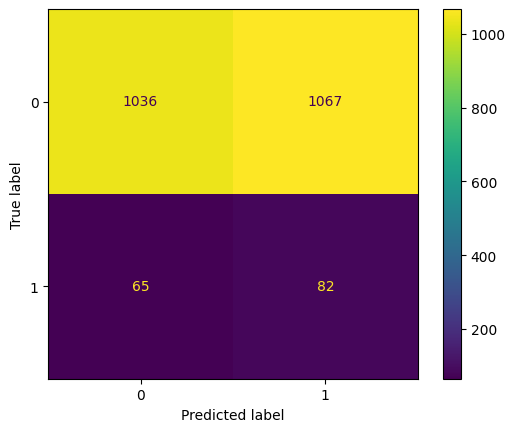

In [104]:
confusion_matrix_log = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred2
)
confusion_matrix.ax_.set_title("Confusion Matrix")
plt.show()


In conculsion - even after we add extra penalty to predict each class as good as possible. 
We will now try to use another classification model 

In [96]:
# Now we will try to use a Random Forest Model 
from sklearn.ensemble import RandomForestClassifier

In [97]:
random_for = RandomForestClassifier(class_weight= "balanced")

In [98]:
random_for.fit(x_train, y_train)

/Users/leta/Desktop/Data Science Career /Python/Python Projects/Fraud Detection /fraud detect/fraud-detect/lib/python3.14/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [99]:
y_pred_rando = random_for.predict(x_test)

In [100]:
balanced_accuracy_score(y_test, y_pred_rando)

0.5

In [101]:
precision_score(y_test, y_pred_rando)

/Users/leta/Desktop/Data Science Career /Python/Python Projects/Fraud Detection /fraud detect/fraud-detect/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.0

In [ ]:
recall_score(y_test, y_pred_rando)

0.0

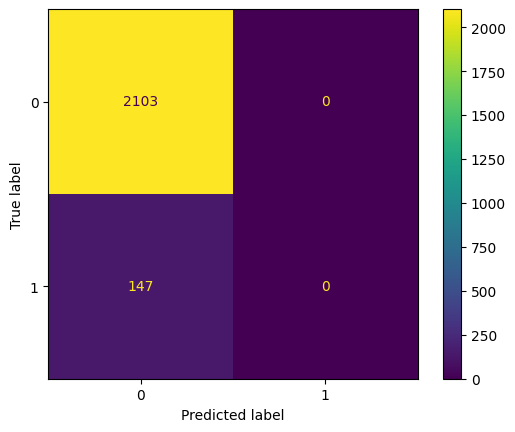

In [105]:
confusion_matrix_rando = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_rando
)
confusion_matrix.ax_.set_title("Confusion Matrix")
plt.show()

Both our models minimise error by just predicting not fraud for all the transaction since the data is so skewed in not fraud approximatley 94/6 %.
Therefore since we have such unbalanced data we have to give a much larger penatly to make our models predict both classes more accuractely.   

## MODEL WITH GREATER PENALTY 

In [ ]:
# We will now create both models with a greater penatly for predicting wrong in our fraud class as well as lower our acceptance threshold for fraud.
Log = LogisticRegression(class_weight= {0:1, 1:50 }) #a mistake in our fraud class (class 1) is 50 times more detrimental than predicting wrong for class 1
Random = RandomForestClassifier(class_weight= {0:1, 1:50 })

In [120]:
algos = [Log, Random]
b_accuracy =[]
recall_metric = []
precision_metric = []
for a in algos: 
    a.fit(x_train, y_train)
    predictions = a.predict(x_test)
    acc = balanced_accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions)
    rec = recall_score(y_test, predictions)
    
    b_accuracy.append(acc)
    recall_metric.append(rec)
    precision_metric.append(prec)


/Users/leta/Desktop/Data Science Career /Python/Python Projects/Fraud Detection /fraud detect/fraud-detect/lib/python3.14/site-packages/sklearn/utils/validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/leta/Desktop/Data Science Career /Python/Python Projects/Fraud Detection /fraud detect/fraud-detect/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [121]:
main_metrics = pd.DataFrame([(algos),b_accuracy,recall_metric,precision_metric])
main_metrics

,0,1
0,"LogisticRegression(class_weight={0: 1, 1: 50})","(DecisionTreeClassifier(max_features='sqrt', r..."
1,0.5,0.5
2,1.0,0.0
3,0.065333,0.0
